# DecisionTree Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1,1279,...,3,80,0,2,2,1,2,2,2,2
1,No,29,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8
2,No,55,Non-Travel,177,Research & Development,8,1,Medical,1,1278,...,4,80,1,34,3,3,33,9,15,0
3,No,46,Travel_Rarely,168,Sales,4,2,Marketing,1,1280,...,3,80,1,26,2,3,11,4,0,8
4,No,34,Travel_Rarely,131,Sales,2,3,Marketing,1,1281,...,4,80,0,4,3,3,3,2,0,2


## Data Preprocessing

### a. Convert the category class Yes / No into 1 and 0, respectively

In [3]:
from sklearn.preprocessing import LabelEncoder

df["Attrition"] = LabelEncoder().fit_transform(df["Attrition"])

df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1,1279,...,3,80,0,2,2,1,2,2,2,2
1,0,29,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8
2,0,55,Non-Travel,177,Research & Development,8,1,Medical,1,1278,...,4,80,1,34,3,3,33,9,15,0
3,0,46,Travel_Rarely,168,Sales,4,2,Marketing,1,1280,...,3,80,1,26,2,3,11,4,0,8
4,0,34,Travel_Rarely,131,Sales,2,3,Marketing,1,1281,...,4,80,0,4,3,3,3,2,0,2


### b. Remove variables that do not change across the observation

In [4]:
mask = (df.nunique(axis=0) != 1).to_numpy()  # drop columns that not unique
df = df.loc[:, mask]
df = df.drop(columns="EmployeeNumber")  # drop categorical unique column
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1,Female,...,4,3,0,2,2,1,2,2,2,2
1,0,29,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,2,Female,...,3,3,1,10,1,3,10,9,8,8
2,0,55,Non-Travel,177,Research & Development,8,1,Medical,4,Male,...,3,4,1,34,3,3,33,9,15,0
3,0,46,Travel_Rarely,168,Sales,4,2,Marketing,4,Female,...,3,3,1,26,2,3,11,4,0,8
4,0,34,Travel_Rarely,131,Sales,2,3,Marketing,3,Female,...,3,4,0,4,3,3,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,34,Travel_Rarely,1239,Sales,13,4,Medical,4,Male,...,3,3,1,9,2,2,8,7,1,1
1466,0,26,Travel_Rarely,157,Research & Development,1,3,Medical,3,Male,...,3,4,0,8,6,2,7,7,7,6
1467,0,29,Travel_Rarely,136,Research & Development,1,3,Life Sciences,1,Male,...,3,1,1,6,5,2,5,3,0,2
1468,0,32,Non-Travel,1146,Research & Development,15,4,Medical,3,Female,...,3,2,1,9,6,3,5,1,1,2


### c. Handle all seven categorical variables

- BusinessTravel (Ordinal)
- Department (Nominal)
- EducationField (Nominal)
- Gender (Symmetric Binary)
- JobRole (Nominal)
- MaritalStatus (Nominal)
- OverTime (Symmetric Binary)

#### Ordinal variable

In [5]:
np.unique(df["BusinessTravel"])

array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object)

In [6]:
BusTrav = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2}
df["BusinessTravel"] = df["BusinessTravel"].map(BusTrav)

#### Nominal variables

In [7]:
nominals = ["Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
df = pd.concat([df, pd.get_dummies(df[nominals], prefix=nominals, drop_first=True)], axis=1)
df.drop(columns=nominals, inplace=True)

df.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,21,2,251,10,2,1,45,2,1,...,1,0,0,0,0,0,0,0,1,0
1,0,29,1,1389,21,4,2,51,4,3,...,0,0,1,0,0,0,0,0,0,0
2,0,55,0,177,8,1,4,37,2,4,...,0,0,0,0,0,0,0,0,0,1
3,0,46,1,168,4,2,4,33,2,5,...,0,1,0,0,0,0,0,1,0,0
4,0,34,1,131,2,3,3,86,3,2,...,0,0,0,0,0,1,0,0,1,1


## Split Training and Testing set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns="Attrition").values, df["Attrition"].values, test_size=0.2, random_state=42
)

## Construct DecisionTree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
DT = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

print("Tree depth:", DT.get_depth())
print("Min Samples split:", DT.min_samples_split)  # By default parameters of DecisionTreeClassifier

Tree depth: 14
Min Samples split: 2


### Confusion Matrix on Test set

In [11]:
y_pred = DT.predict(X_test)

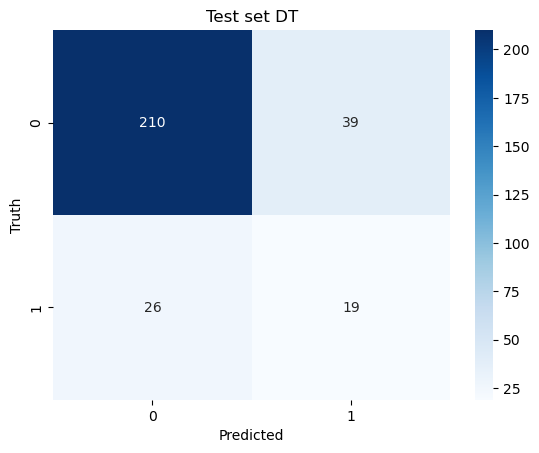

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       249
           1       0.33      0.42      0.37        45

    accuracy                           0.78       294
   macro avg       0.61      0.63      0.62       294
weighted avg       0.80      0.78      0.79       294



In [12]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion, fmt="g", annot=True, cmap="Blues")
plt.title("Test set DT")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_test, y_pred))

### Confusion Matrix on Train set

In [13]:
y_pred = DT.predict(X_train)

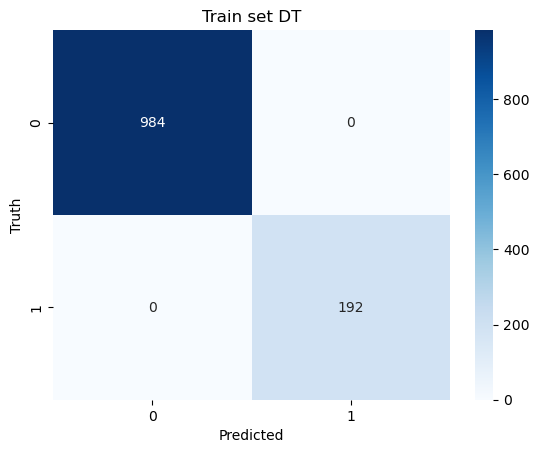

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00       192

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [14]:
confusion = confusion_matrix(y_train, y_pred)

sns.heatmap(confusion, fmt="g", annot=True, cmap="Blues")
plt.title("Train set DT")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_train, y_pred))

### Plot tree

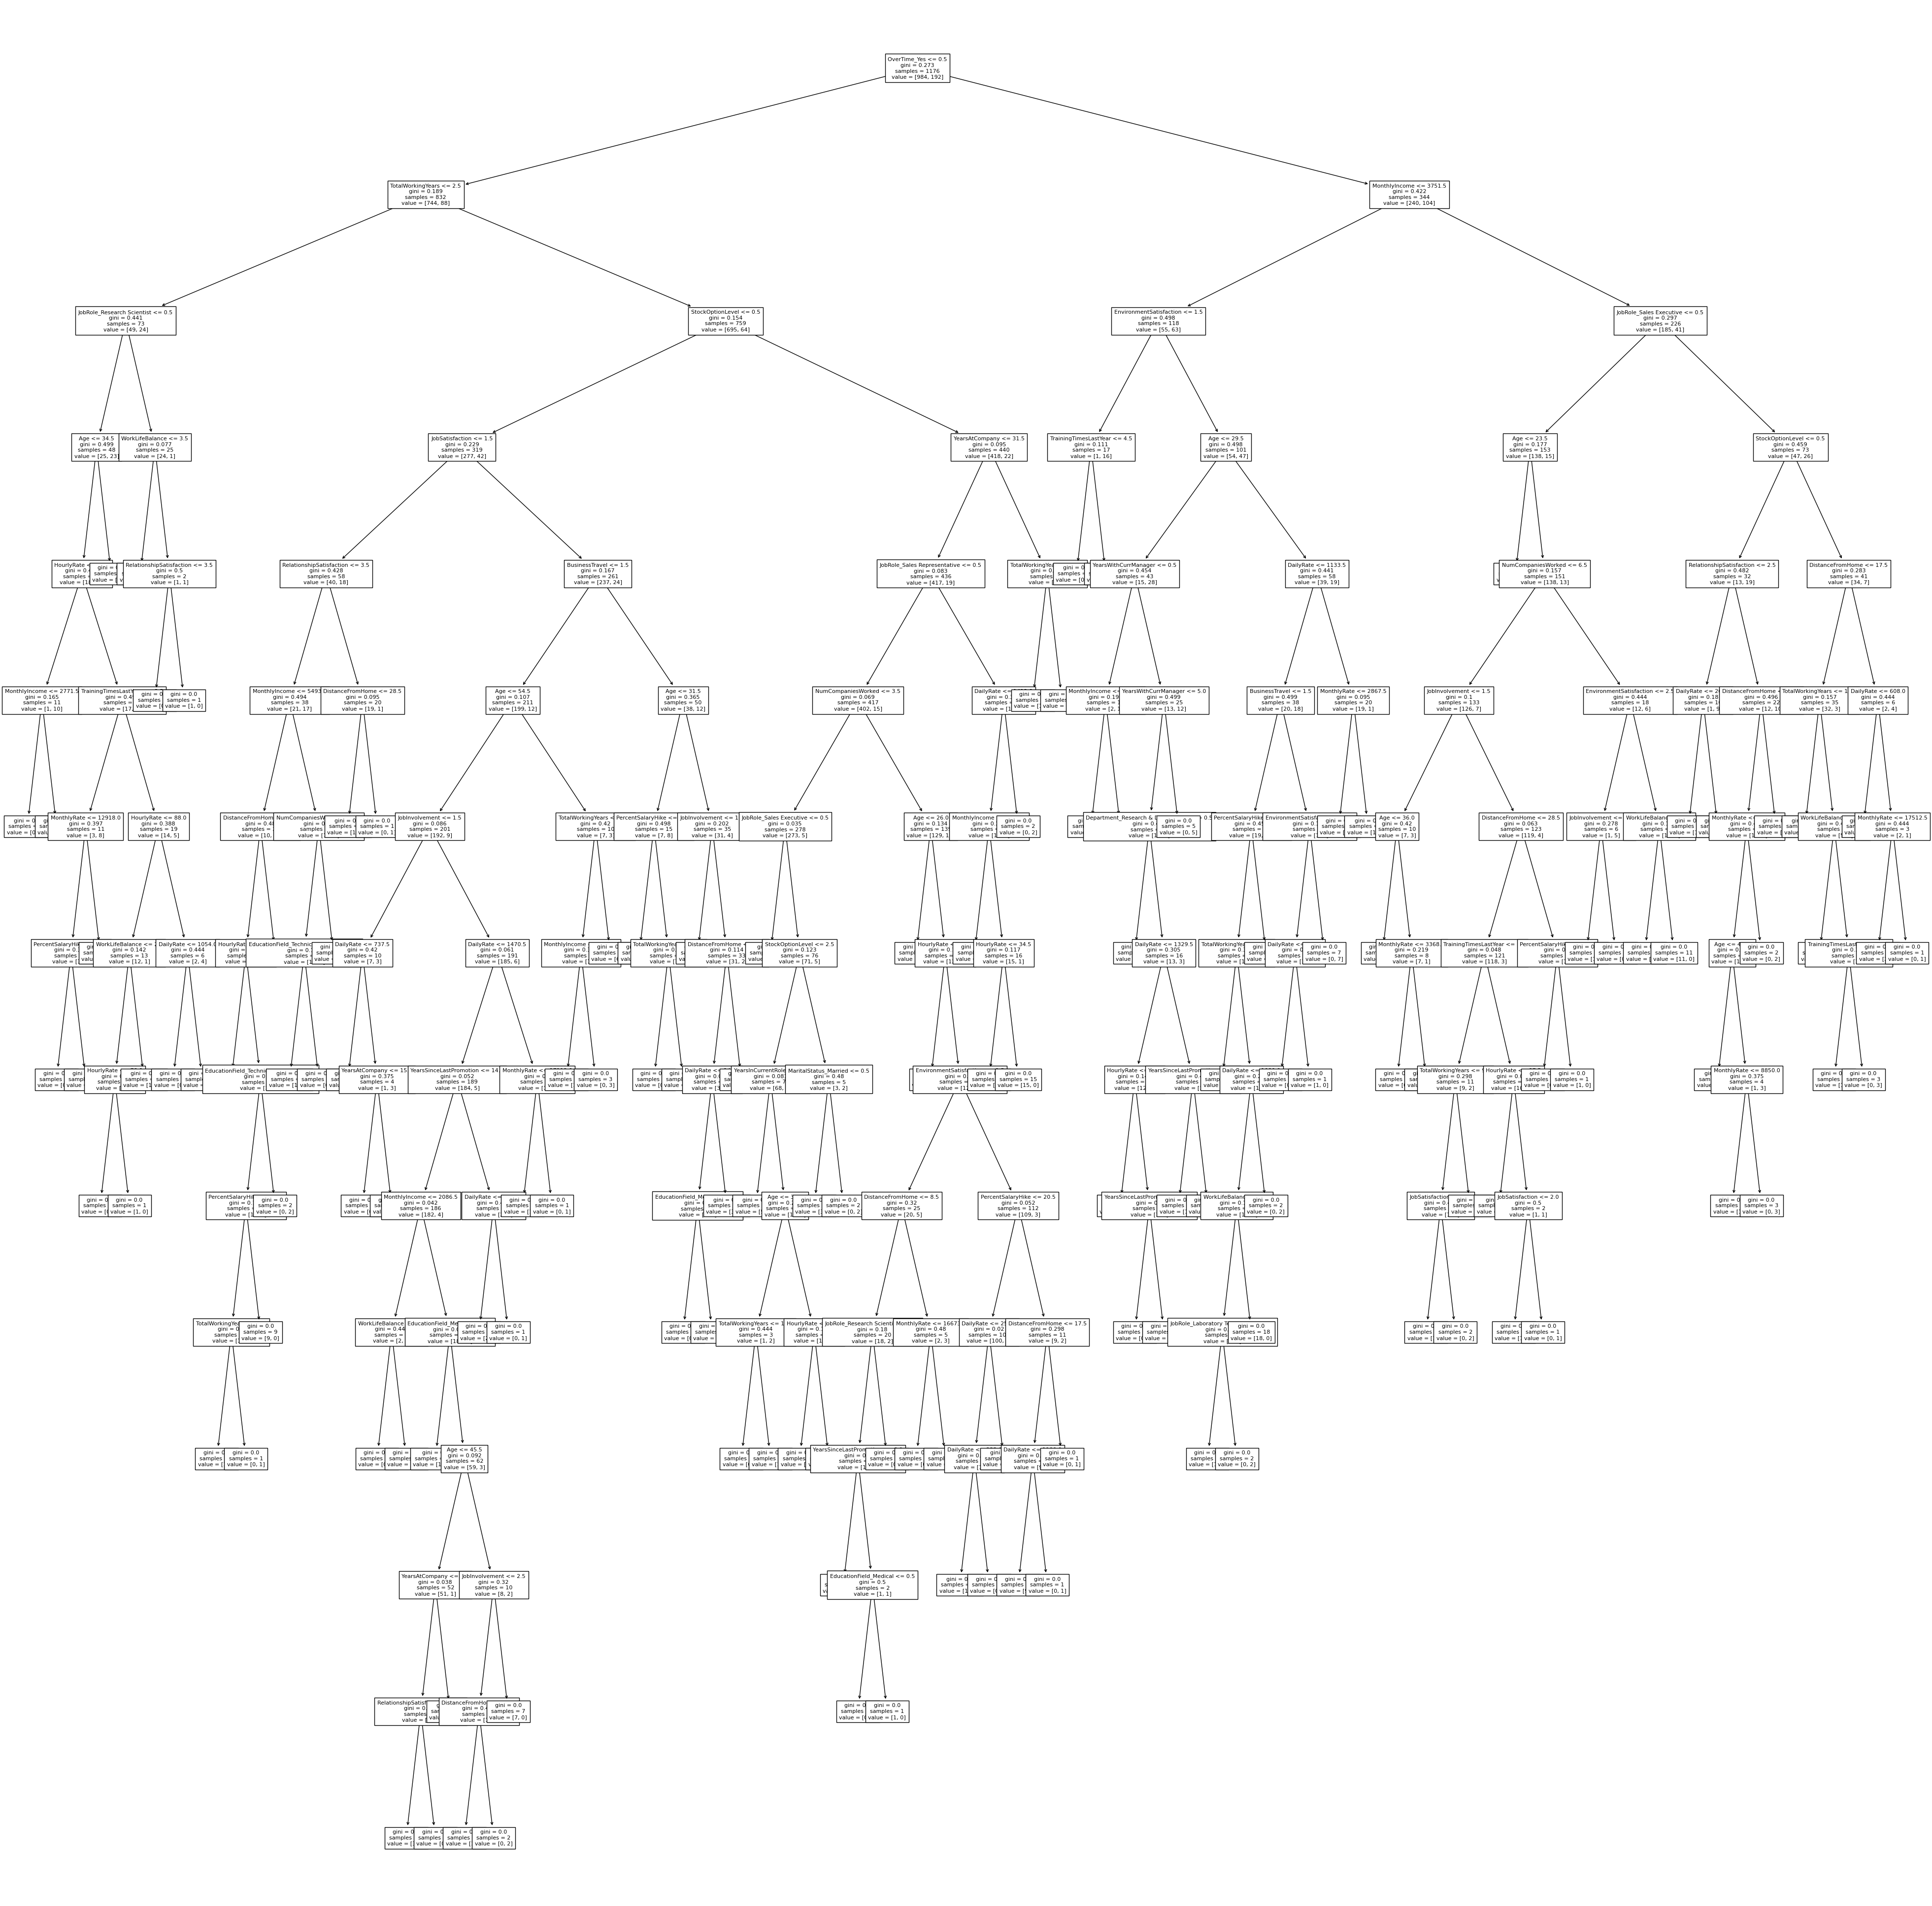

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 50))
plot_tree(DT, fontsize=8, feature_names=df.columns[1:])
plt.show()

## Construct DecisionTree (w/ GridSearchCV)

In [16]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": list(range(2, 15)), "min_samples_split": list(range(2, 401))}

DT_EST = DecisionTreeClassifier(random_state=42)
DT_GCV = GridSearchCV(DT_EST, parameters)

DT_GCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, 31, ...]})

In [17]:
pd.DataFrame(DT_GCV.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
270,0.001557,0.000135,0.000204,0.000052,2,272,"{'max_depth': 2, 'min_samples_split': 272}",0.834746,0.846809,0.825532,0.838298,0.846809,0.838439,0.008004,1
271,0.001555,0.000119,0.000199,0.000032,2,273,"{'max_depth': 2, 'min_samples_split': 273}",0.834746,0.846809,0.825532,0.838298,0.846809,0.838439,0.008004,1
289,0.001362,0.000051,0.000198,0.000096,2,291,"{'max_depth': 2, 'min_samples_split': 291}",0.834746,0.838298,0.838298,0.838298,0.834043,0.836736,0.001925,3
311,0.001381,0.000063,0.000178,0.000049,2,313,"{'max_depth': 2, 'min_samples_split': 313}",0.834746,0.838298,0.838298,0.838298,0.834043,0.836736,0.001925,3
312,0.001412,0.000100,0.000185,0.000061,2,314,"{'max_depth': 2, 'min_samples_split': 314}",0.834746,0.838298,0.838298,0.838298,0.834043,0.836736,0.001925,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,0.005615,0.000236,0.000226,0.000026,13,10,"{'max_depth': 13, 'min_samples_split': 10}",0.750000,0.795745,0.791489,0.748936,0.774468,0.772128,0.019827,5183
3998,0.005531,0.000164,0.000197,0.000030,12,10,"{'max_depth': 12, 'min_samples_split': 10}",0.750000,0.795745,0.791489,0.744681,0.774468,0.771277,0.020868,5184
4788,0.005925,0.000259,0.000242,0.000035,14,2,"{'max_depth': 14, 'min_samples_split': 2}",0.733051,0.804255,0.770213,0.770213,0.774468,0.770440,0.022617,5185
4796,0.005885,0.000352,0.000343,0.000033,14,10,"{'max_depth': 14, 'min_samples_split': 10}",0.750000,0.791489,0.791489,0.740426,0.774468,0.769574,0.021058,5186


In [18]:
DT_BEST = DT_GCV.best_estimator_
DT_BEST

DecisionTreeClassifier(max_depth=2, min_samples_split=272, random_state=42)

In [19]:
print(DT_GCV.best_params_)

{'max_depth': 2, 'min_samples_split': 272}


### Confusion Matrix on Test set

In [20]:
y_pred = DT_BEST.predict(X_test)

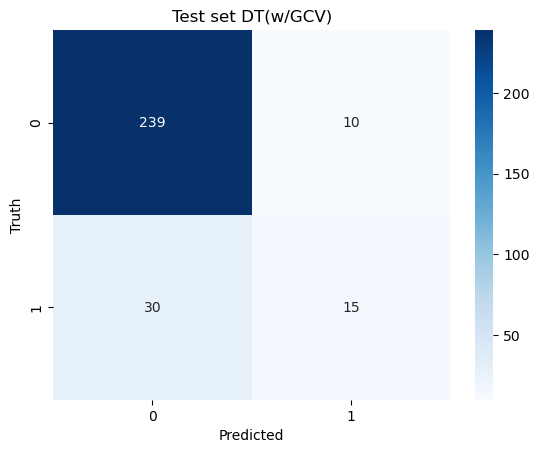

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       249
           1       0.60      0.33      0.43        45

    accuracy                           0.86       294
   macro avg       0.74      0.65      0.68       294
weighted avg       0.84      0.86      0.85       294



In [21]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion, fmt="g", annot=True, cmap="Blues")
plt.title("Test set DT(w/GCV)")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_test, y_pred))

### Confusion Matrix on Train set

In [22]:
y_pred = DT_BEST.predict(X_train)

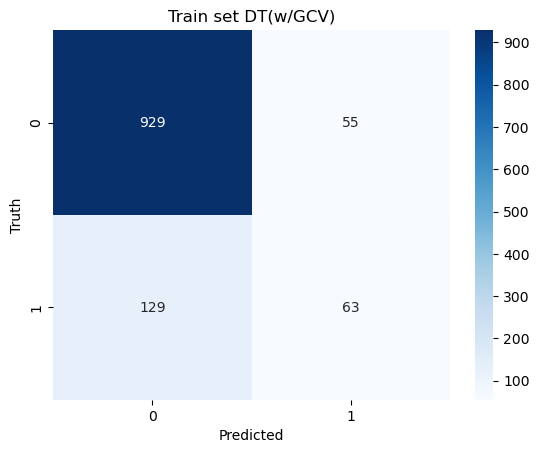

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       984
           1       0.53      0.33      0.41       192

    accuracy                           0.84      1176
   macro avg       0.71      0.64      0.66      1176
weighted avg       0.82      0.84      0.83      1176



In [23]:
confusion = confusion_matrix(y_train, y_pred)

sns.heatmap(confusion, fmt="g", annot=True, cmap="Blues")
plt.title("Train set DT(w/GCV)")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_train, y_pred))

### Plot tree

2


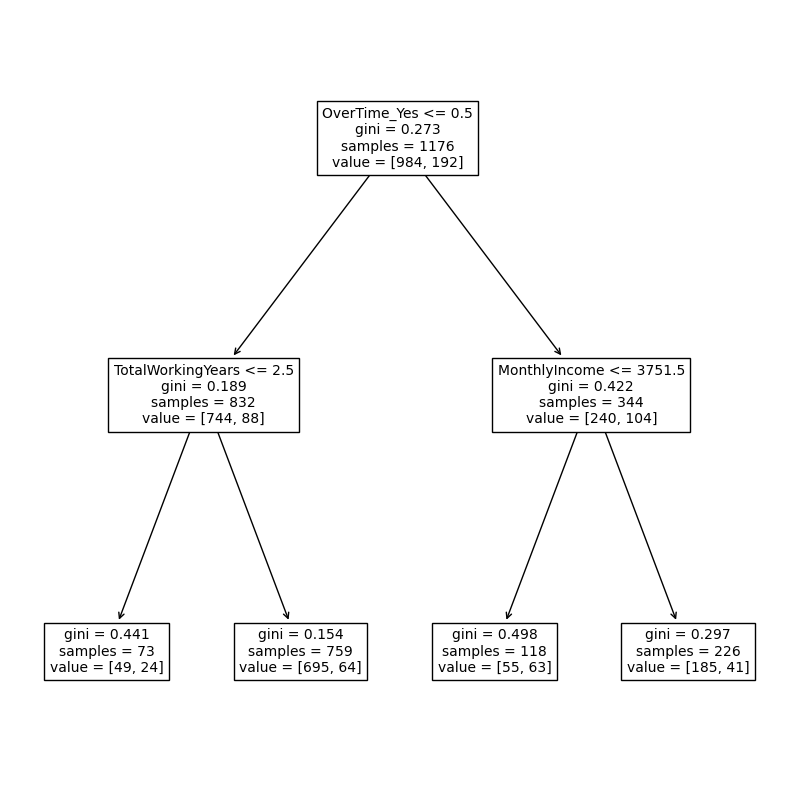

In [24]:
from sklearn.tree import plot_tree

print(DT_BEST.get_depth())
plt.figure(figsize=(10, 10))
plot_tree(DT_BEST, fontsize=10, feature_names=df.columns[1:])
plt.show()

## Construct Random Forest (w/ GridSearchCV)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
parameters = {
    "max_depth": list(range(2, 15, 4)),
    "min_samples_split": list(range(2, 403, 100)),
    "n_estimators": list(range(2, 301, 40)),
    "max_features": list(range(1, df.shape[1], 15)),
}
print(np.prod([len(v) for v in parameters.values()]))

RF_EST = RandomForestClassifier(random_state=42)
RF_GCV = GridSearchCV(RF_EST, parameters)

RF_GCV.fit(X_train, y_train)

480


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 6, 10, 14],
                         'max_features': [1, 16, 31],
                         'min_samples_split': [2, 102, 202, 302, 402],
                         'n_estimators': [2, 42, 82, 122, 162, 202, 242, 282]})

In [27]:
pd.DataFrame(RF_GCV.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
404,0.284543,0.002757,0.006753,0.000108,14,16,2,162,"{'max_depth': 14, 'max_features': 16, 'min_sam...",0.855932,0.880851,0.851064,0.851064,0.859574,0.859697,0.011052,1
402,0.143627,0.001984,0.003500,0.000033,14,16,2,82,"{'max_depth': 14, 'max_features': 16, 'min_sam...",0.851695,0.876596,0.846809,0.855319,0.859574,0.857999,0.010203,2
403,0.214040,0.003528,0.005069,0.000067,14,16,2,122,"{'max_depth': 14, 'max_features': 16, 'min_sam...",0.847458,0.876596,0.851064,0.846809,0.859574,0.856300,0.011121,3
284,0.289635,0.007915,0.006973,0.000220,10,16,2,162,"{'max_depth': 10, 'max_features': 16, 'min_sam...",0.855932,0.863830,0.846809,0.855319,0.859574,0.856293,0.005632,4
326,0.667979,0.006126,0.009549,0.000075,10,31,2,242,"{'max_depth': 10, 'max_features': 31, 'min_sam...",0.868644,0.855319,0.846809,0.846809,0.863830,0.856282,0.008834,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.001782,0.000071,0.000310,0.000018,14,1,2,2,"{'max_depth': 14, 'max_features': 1, 'min_samp...",0.834746,0.817021,0.817021,0.808511,0.834043,0.822268,0.010379,476
320,0.005806,0.000200,0.000341,0.000052,10,31,2,2,"{'max_depth': 10, 'max_features': 31, 'min_sam...",0.822034,0.829787,0.800000,0.825532,0.800000,0.815471,0.012868,477
160,0.003223,0.000055,0.000304,0.000012,6,16,2,2,"{'max_depth': 6, 'max_features': 16, 'min_samp...",0.822034,0.800000,0.821277,0.834043,0.778723,0.811215,0.019600,478
240,0.001758,0.000063,0.000302,0.000006,10,1,2,2,"{'max_depth': 10, 'max_features': 1, 'min_samp...",0.800847,0.804255,0.808511,0.825532,0.808511,0.809531,0.008501,479


In [28]:
RF_BEST = RF_GCV.best_estimator_
RF_BEST

RandomForestClassifier(max_depth=14, max_features=16, n_estimators=162,
                       random_state=42)

In [29]:
print(RF_GCV.best_params_)

{'max_depth': 14, 'max_features': 16, 'min_samples_split': 2, 'n_estimators': 162}


### Confusion Matrix on Test set

In [30]:
y_pred = RF_BEST.predict(X_test)

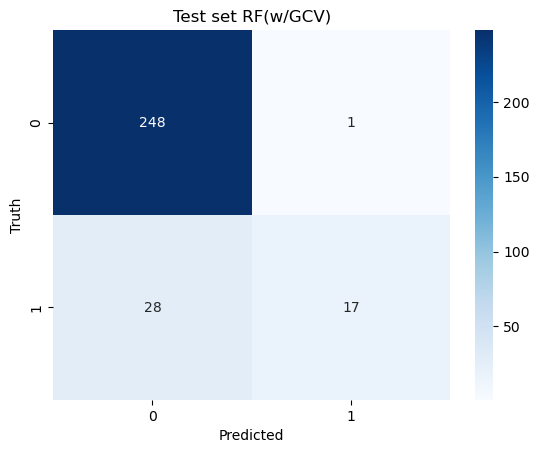

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       249
           1       0.94      0.38      0.54        45

    accuracy                           0.90       294
   macro avg       0.92      0.69      0.74       294
weighted avg       0.91      0.90      0.88       294



In [31]:
confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion, fmt="g", annot=True, cmap="Blues")
plt.title("Test set RF(w/GCV)")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_test, y_pred))

### Confusion Matrix on Train set

In [32]:
y_pred = RF_BEST.predict(X_train)

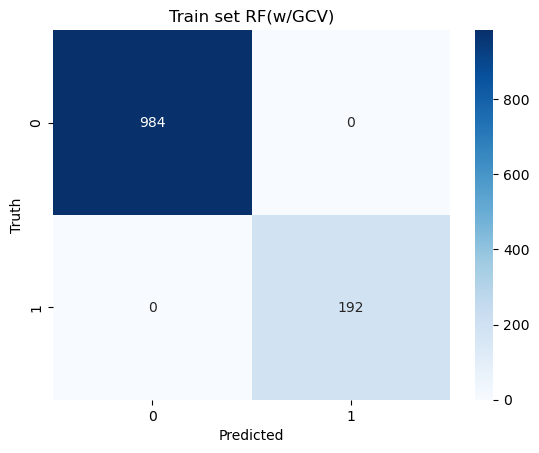

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00       192

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [33]:
confusion = confusion_matrix(y_train, y_pred)

sns.heatmap(confusion, fmt="g", annot=True, cmap="Blues")
plt.title("Train set RF(w/GCV)")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_train, y_pred))